In [ ]:
## Copied kaggle api authentication json to Collab

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
## Download dataset from kaggle directly into local path on Collab

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 41.9MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


In [ ]:
## Unzip the downloaded dataset

import zipfile
zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipref.extractall('/content')
zipref.close()

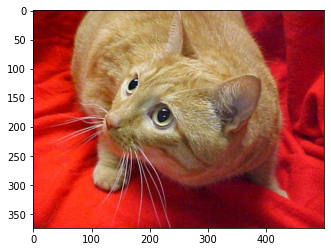

In [ ]:
## Plot one image to see how it looks

import matplotlib.pyplot as plt
from PIL import Image

# Load image from file
image = Image.open('/content/test/cats/cat.18.jpg')
plt.imshow(image)
plt.show()

In [ ]:
## import necessary libraries to start building CNN

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
## Load datasets into memory (RAM)
## however loading all images will consume too much memory
## Create a generator and load image as demanded in batch

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
## Normalize datasets as pixel values are between 0-255,
## convert it to the scale 0-1
## Normalized datasets perform better while converging to minimum cost function 

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return (image, label)

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
## Create the CNN model
## 

model = Sequential()

## Convolution and pooling part of it
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())

## ANN part of it
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
## Get syummary of the model and have a look at the structure
## make sure all is as expected

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
## compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## run or fit the model

history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 87ms/step - loss: 0.6259 - accuracy: 0.6449 - val_loss: 0.5820 - val_accuracy: 0.7000
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5043 - accuracy: 0.7506 - val_loss: 0.4918 - val_accuracy: 0.7640
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4000 - accuracy: 0.8141 - val_loss: 0.4839 - val_accuracy: 0.7672
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2697 - accuracy: 0.8862 - val_loss: 0.5419 - val_accuracy: 0.7884
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1406 - accuracy: 0.9446 - val_loss: 0.7786 - val_accuracy: 0.7786
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0794 - accuracy: 0.9718 - val_loss: 0.9677 - val_accuracy: 0.7814
Epoch 7/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0618 - accuracy: 0.9798 - val_loss: 1.0946 - val_accuracy:

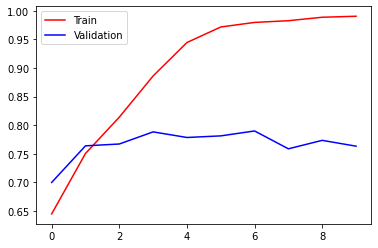

In [ ]:
## Draw accuracy plot to evaluate model performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show() 

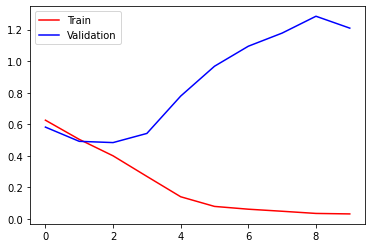

In [ ]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.show() 

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
## From the graphs above, it clear that its a case of 'Overfitting'
## Add atchNormalization and Dropout to fix overfitting
from keras.layers import BatchNormalization, Dropout

model = Sequential()

## Convolution and pooling part of it
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())

## ANN part of it
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
## compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## run or fit the model

history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.1301 - accuracy: 0.5552 - val_loss: 0.6829 - val_accuracy: 0.6058
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6239 - accuracy: 0.6508 - val_loss: 0.8192 - val_accuracy: 0.6192
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5377 - accuracy: 0.7329 - val_loss: 0.6195 - val_accuracy: 0.6596
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4700 - accuracy: 0.7833 - val_loss: 0.4648 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4077 - accuracy: 0.8184 - val_loss: 0.4797 - val_accuracy: 0.7654
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3318 - accuracy: 0.8583 - val_loss: 0.5019 - val_accuracy: 0.7888
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2464 - accuracy: 0.9021 - val_loss: 0.4745 - val_ac

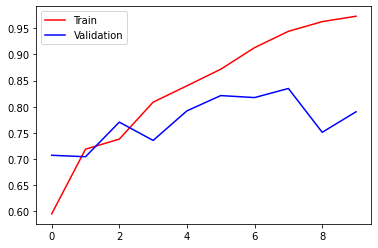

In [ ]:
## Draw accuracy plot to evaluate model performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show() 

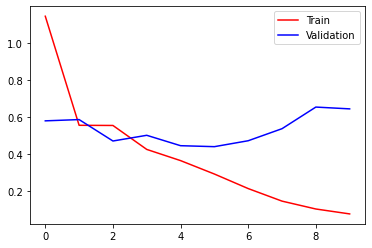

In [ ]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.show() 

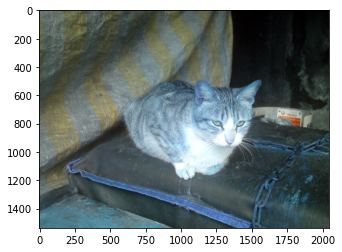

Original image shape : (1536, 2048, 3)
New image shape      : (256, 256, 3)
255
0


The Prediction is :

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [ ]:
import cv2
import matplotlib.pyplot as plt

## I winder why we are not Normalizing the image before passing it to the model ?

img = cv2.imread('cat.jpg')
plt.imshow(img)
plt.show()

print("Original image shape :",img.shape)
img = cv2.resize(img, (256,256))
print("New image shape      :",img.shape)

test_input = img.reshape((1,256,256,3))
print(np.max(test_input))
print(np.min(test_input))

print("\n\nThe Prediction is :\n")
model.predict(test_input)

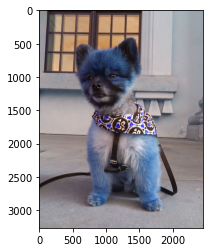

Original image shape : (3264, 2448, 3)
New image shape      : (256, 256, 3)
255
0


The Prediction is :

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [ ]:
## Let us try the dog image this time

img = cv2.imread('dog.jpg')
plt.imshow(img)
plt.show()

print("Original image shape :",img.shape)
img = cv2.resize(img, (256,256))
print("New image shape      :",img.shape)

## let me normalize the image bbefore passing it to the model
#img = tf.cast(img/255, tf.float32)


test_input = img.reshape((1,256,256,3))
print(np.max(test_input))
print(np.min(test_input))

print("\n\nThe Prediction is :\n")
model.predict(test_input)
